Importation des librairies

In [2]:
import pandas as pd
import numpy as np

chargement des fichiers csv

In [16]:
# Chargement du fichier CSV
fish_catches = pd.read_csv("fish_catches.csv")
country_codes = pd.read_csv("country_codes.csv")

print("Aperçu des 5 premières lignes du CSV :")
print(fish_catches.head())
print(country_codes.head())

Aperçu des 5 premières lignes du CSV :
  Species    Area Units Country   2014    2013    2012    2011    2010   2009  \
0     ANF      27   TLW      BE  993.0  1633.0  1716.0  1279.0  1031.0  853.0   
1     ANF    27.4   TLW      BE  217.0   137.0   133.0   116.0   131.0  140.0   
2     ANF  27.4.A   TLW      BE    0.0     0.0     0.0     0.0     0.0    0.0   
3     ANF  27.4.B   TLW      BE  213.0   135.0   131.0   111.0   124.0  134.0   
4     ANF  27.4.C   TLW      BE    4.0     2.0     2.0     6.0     7.0    6.0   

   ...  Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  \
0  ...          NaN          NaN          NaN          NaN          NaN   
1  ...          NaN          NaN          NaN          NaN          NaN   
2  ...          NaN          NaN          NaN          NaN          NaN   
3  ...          NaN          NaN          NaN          NaN          NaN   
4  ...          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 20  Unnamed

Identifier et supprimer les colonnes inutiles

In [19]:
fish_catches_cleaned = fish_catches.drop(columns=[col for col in fish_catches.columns if "Unnamed" in col])

Nettoyer le nom des colonnes du fichier country_codes.csv

In [22]:
country_codes_cleaned = country_codes.rename(columns=lambda x: x.strip())

Vérifier les données nettoyées

In [25]:
print(fish_catches_cleaned.info())
print(country_codes_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49110 entries, 0 to 49109
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49109 non-null  object 
 1   Area     49109 non-null  object 
 2   Units    49109 non-null  object 
 3   Country  49109 non-null  object 
 4   2014     49109 non-null  float64
 5   2013     49109 non-null  float64
 6   2012     49109 non-null  float64
 7   2011     49109 non-null  float64
 8   2010     49109 non-null  float64
 9   2009     49109 non-null  float64
 10  2008     49109 non-null  float64
 11  2007     49109 non-null  float64
 12  2006     49109 non-null  float64
dtypes: float64(9), object(4)
memory usage: 4.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         34 non-null     object
 1   Description  34 non-null     objec

Sauvegarder les fichiers nettoyés

In [28]:
fish_catches_cleaned.to_csv('fish_catches_cleaned.csv', index=False)
country_codes_cleaned.to_csv('country_codes_cleaned.csv', index=False)

analyse exploratoire des données

Importation des bibliothèques nécessaires

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Chargement des datasets nettoyés

In [36]:
country_codes_cleaned = pd.read_csv('country_codes_cleaned.csv')  
fish_catches_cleaned = pd.read_csv('fish_catches_cleaned.csv')

Évolution des captures totales par année

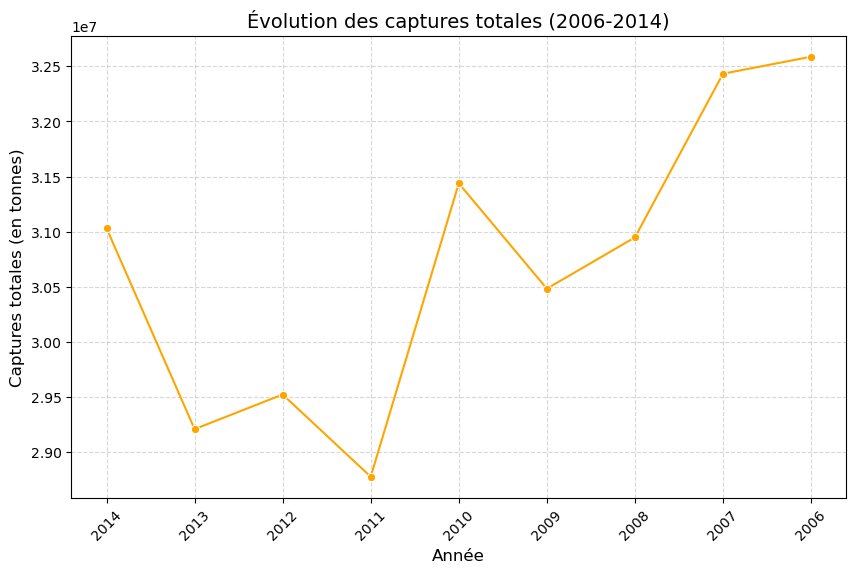

In [39]:
annual_totals = fish_catches_cleaned.iloc[:, 4:].sum()

# Visualiser l'évolution des captures totales par année
plt.figure(figsize=(10, 6))
sns.lineplot(x=annual_totals.index, y=annual_totals.values, marker='o', color='orange')
plt.title("Évolution des captures totales (2006-2014)", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Captures totales (en tonnes)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()

Top 10 des espèces les plus capturées

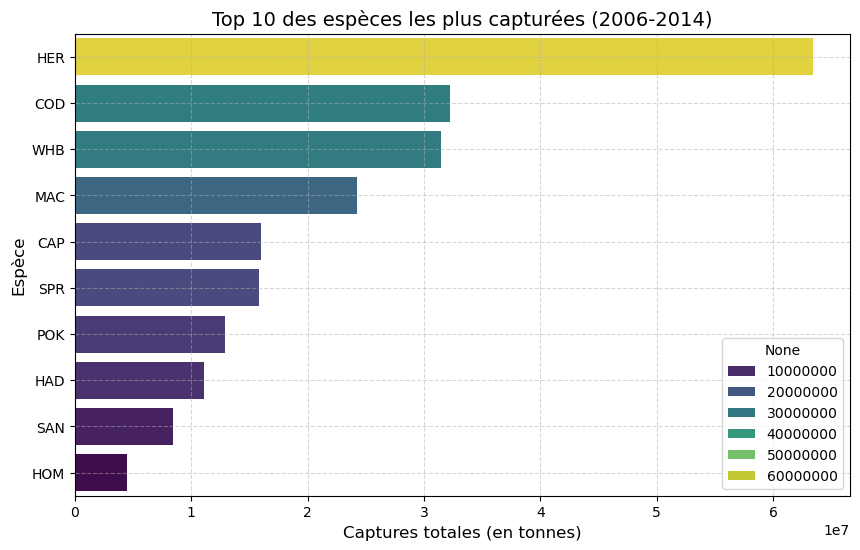

In [55]:
# Calculer les totaux par espèce
species_totals = fish_catches_cleaned.groupby("Species").sum().iloc[:, 3:].sum(axis=1)
top_species = species_totals.sort_values(ascending=False).head(10)

# Visualiser les 10 espèces les plus capturées
plt.figure(figsize=(10, 6))
sns.barplot(x=top_species.values, y=top_species.index, hue=top_species, palette="viridis")
plt.title("Top 10 des espèces les plus capturées (2006-2014)", fontsize=14)
plt.xlabel("Captures totales (en tonnes)", fontsize=12)
plt.ylabel("Espèce", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()


Top 10 des pays avec les captures les plus élevées

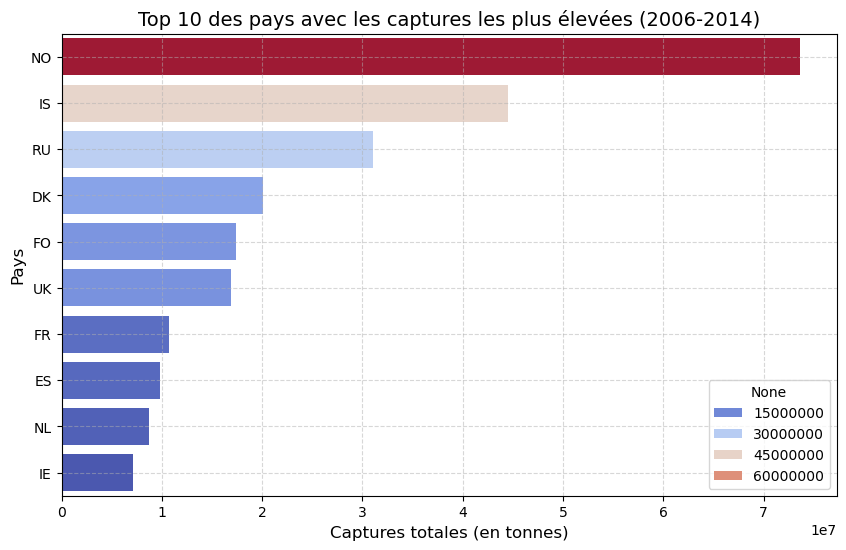

In [51]:
# Calculer les totaux par pays
country_totals = fish_catches_cleaned.groupby("Country").sum().iloc[:, 3:].sum(axis=1)
top_countries = country_totals.sort_values(ascending=False).head(10)

# Visualiser les 10 pays avec les captures les plus élevées
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries, palette="coolwarm")
plt.title("Top 10 des pays avec les captures les plus élevées (2006-2014)", fontsize=14)
plt.xlabel("Captures totales (en tonnes)", fontsize=12)
plt.ylabel("Pays", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()


Étapes d'analyse géographique

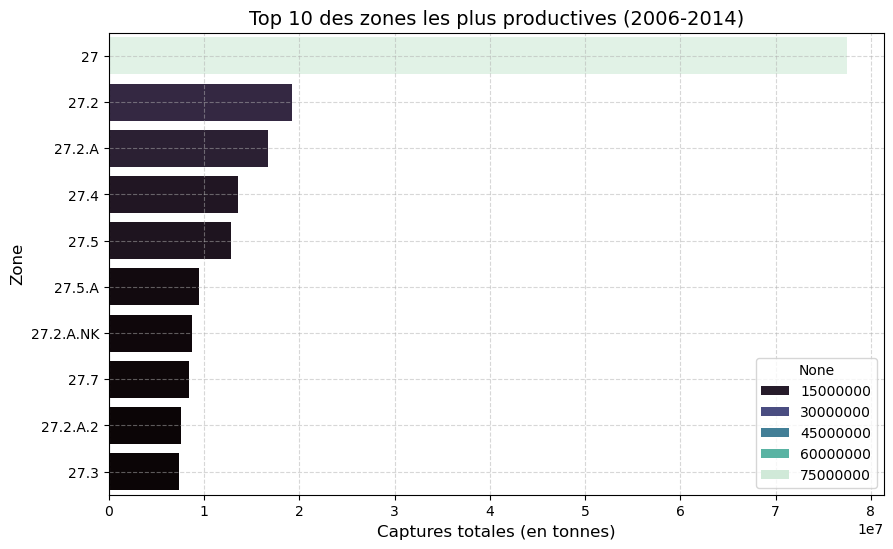

In [60]:
# Calculer les captures totales par zone
area_totals = fish_catches_cleaned.groupby("Area").sum().iloc[:, 3:].sum(axis=1)

# Trier pour trouver les zones les plus productives
top_areas = area_totals.sort_values(ascending=False).head(10)

# Visualiser les zones les plus productives
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_areas.values, y=top_areas.index, hue=top_areas, palette="mako")
plt.title("Top 10 des zones les plus productives (2006-2014)", fontsize=14)
plt.xlabel("Captures totales (en tonnes)", fontsize=12)
plt.ylabel("Zone", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()


Comparaison des captures par zone et par année

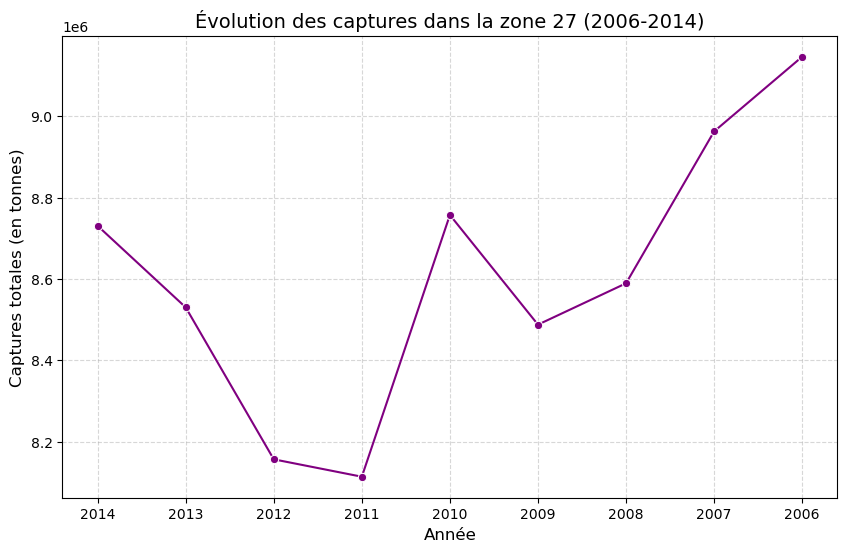

In [63]:
# Calculer les captures par année et par zone
area_yearly_totals = fish_catches_cleaned.groupby("Area").sum().iloc[:, 3:]

# Visualiser pour une zone spécifique, par exemple la zone "27"
zone_27 = area_yearly_totals.loc["27"]

plt.figure(figsize=(10, 6))
sns.lineplot(x=zone_27.index, y=zone_27.values, marker="o", color="purple")
plt.title("Évolution des captures dans la zone 27 (2006-2014)", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Captures totales (en tonnes)", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()


Répartition des captures par zone et par espèce

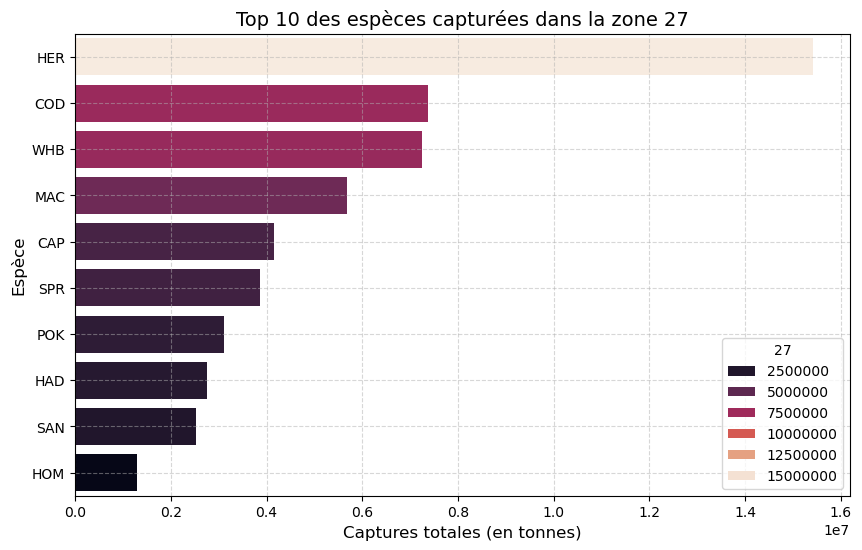

In [68]:
# Calculer les captures totales par espèce et par zone
area_species_totals = fish_catches_cleaned.groupby(["Area", "Species"]).sum().iloc[:, 3:].sum(axis=1).unstack()

# Visualiser pour une zone spécifique, par exemple la zone "27"
area_27_species = area_species_totals.loc["27"].sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=area_27_species.values, y=area_27_species.index, hue=area_27_species, palette="rocket")
plt.title("Top 10 des espèces capturées dans la zone 27", fontsize=14)
plt.xlabel("Captures totales (en tonnes)", fontsize=12)
plt.ylabel("Espèce", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()


Préparation du tableau Power BI

In [71]:
# Exporter les captures totales par zone
area_totals = fish_catches_cleaned.groupby("Area").sum().iloc[:, 3:].sum(axis=1)
area_totals.to_csv("area_totals.csv", index=True)

# Exporter les captures totales par année
annual_totals = fish_catches_cleaned.iloc[:, 4:].sum()
annual_totals.to_frame(name="Total_Captures").reset_index().to_csv("annual_totals.csv", index=False)

# Exporter les captures par zone et espèce
area_species_totals = fish_catches_cleaned.groupby(["Area", "Species"]).sum().iloc[:, 3:].sum(axis=1).unstack()
area_species_totals.to_csv("area_species_totals.csv")
